# EX 1
Write a multivariate stable distribution generator for any given discrete spectral mea-
sure and parameter α. Consider only 2 dimensional case. Present your simulated
sample on scatterplot. Simulate the following cases

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from basic_units import radians, degrees, cos

sns.set()
pi = np.pi

In [5]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)
    
def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta
    
def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type = 1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type ==0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")

In [6]:
def multivariate_stable_distributions(alpha, array):
    n = array.shape[0]
    Z = [stable_random_variables(alpha=alpha, beta=1) for _ in range(n)]
    if alpha == 1:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha) * Z, axis=1)
    else:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha)*(Z+ 2/pi*np.log(array[:,0])),axis=1)

In [7]:
def multivariate_stable_distributions(alpha, array):
    n = array.shape[0]
    Z = [stable_random_variables(alpha=alpha, beta=1) for _ in range(n)]
    y = np.random.uniform(0,1)
    if alpha == 1:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha) * Z, axis=1)
    else:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha)*(Z+ 2/pi*np.log(array[:,0])),axis=1)

## a) symmetric stable vector

In [4]:
alpha = 0.9
arr1 = np.array([
    [0.25 ,  1  , 0],
    [0.125,  1/2, np.sqrt(3)/2],
    [0.25 , -1/2, np.sqrt(3)/2],
    [0.25 , -1  , 0],
    [0.125, -1/2, -np.sqrt(3)/2],
    [0.25 , 1/2 , -np.sqrt(3)/2],
])

In [87]:
X = np.array([multivariate_stable_distributions(0.9 , arr1) for _ in range(50000)])

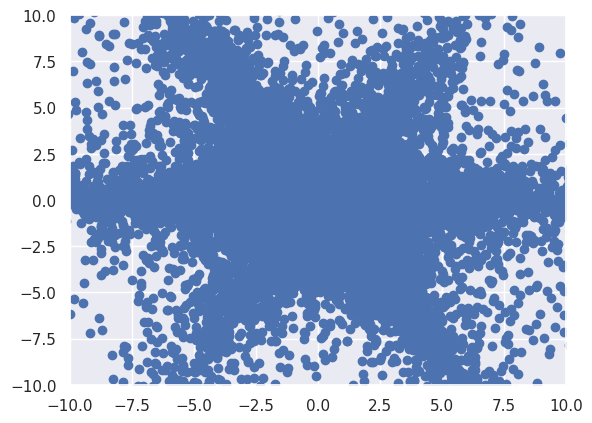

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

/tmp/ipykernel_40891/2033997804.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(


(-2.0, 2.0)

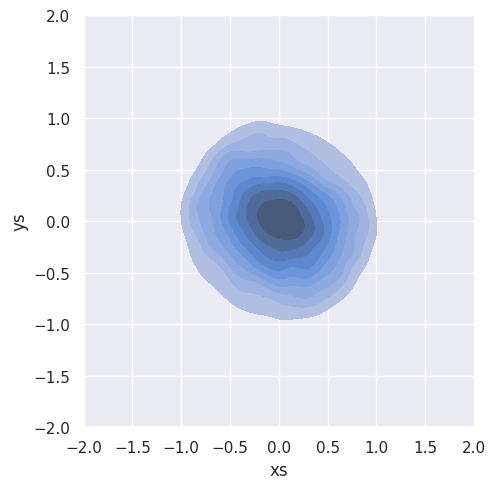

In [26]:
maskX = X[np.sqrt(X[:, 0]**2 + X[:, 1]**2) < 1]
sns.displot(
    data= pd.DataFrame(maskX, columns= ["xs","ys"]), x = "xs", y = "ys", kind="kde",fill=True
)
lim = 2
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

In [88]:
maskX = X[np.sqrt(X[:, 0]**2 + X[:, 1]**2) < 2]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-2.3903765987226477 2.397507401963944 -2.393897503516355 2.3958188176073363


In [89]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

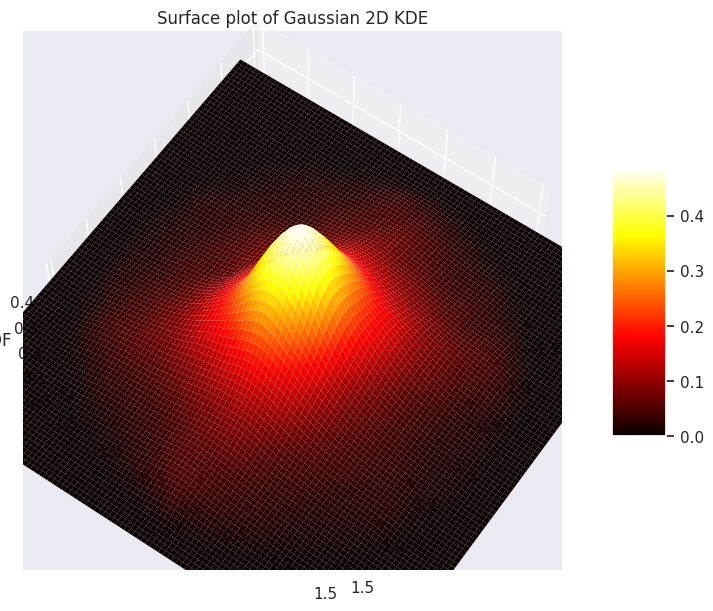

In [90]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 1.5
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

(-2.0, 2.0)

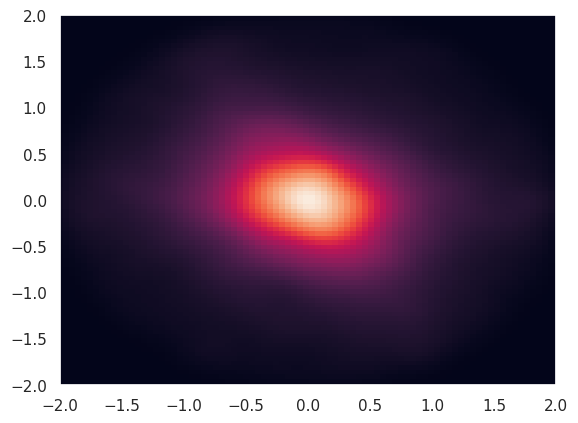

In [91]:
plt.pcolormesh(xx, yy, f)
plt.xlim(-2,2)
plt.ylim(-2,2)

## b) sub-gaussian in general sub-stable) vector


In [23]:
def ex_1_b(alpha, beta, gamma, delta, sigma , size = [1, 1]):
    sqrt_A = [[stable_random_variables(alpha, beta, gamma, delta)**(1/2)] for _ in range(size[0])]
    return sqrt_A * np.random.normal(0, sigma, size)

In [24]:
alpha = 1.6
beta = 1
gamma = 1
delta = 0
A = stable_random_variables(alpha/2, beta, gamma, delta)
sigma = 1
d = 2
n = 100000
sigmas = 1

X_1_b  = ex_1_b(alpha, beta, gamma, delta, sigma, size = [n, d])

/tmp/ipykernel_41981/2194375.py:2: RuntimeWarning: invalid value encountered in scalar power
  sqrt_A = [[stable_random_variables(alpha, beta, gamma, delta)**(1/2)] for _ in range(size[0])]


(-30.0, 30.0)

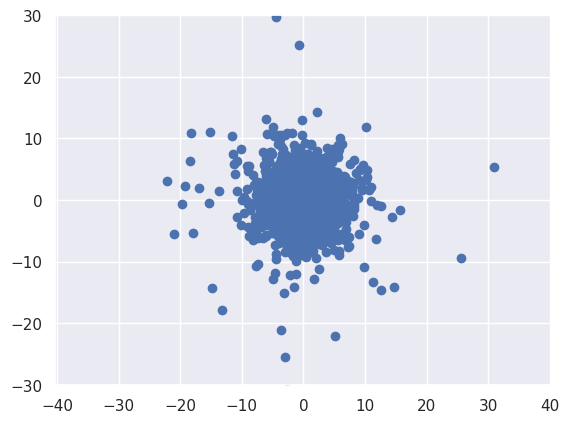

In [52]:
plt.scatter(X_1_b[:, 0], X_1_b[:, 1])
lim = 30
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

In [18]:
mask_1b = np.sqrt(X_1_b[:, 0]**2 + X_1_b[:, 1]**2) < 10
X_1_b_mask = X_1_b[mask_1b]
x = X_1_b_mask[:, 0]
y = X_1_b_mask[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:150j, ymin:ymax:150j]

-11.768030588827775 11.766053658011726 -11.22790020079471 11.761036649244442


In [19]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

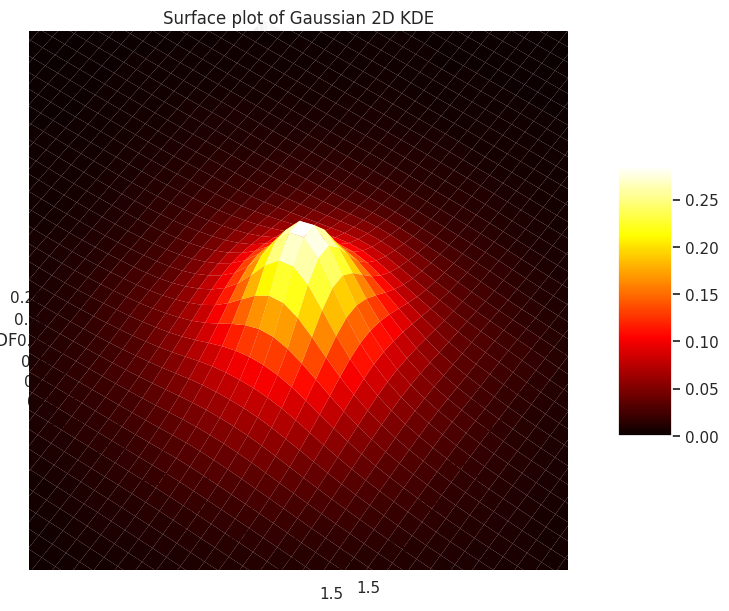

In [20]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 1.5
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

(-2.0, 2.0)

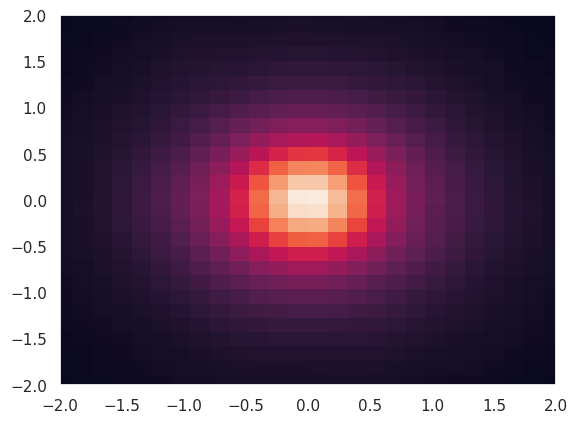

In [21]:
plt.pcolormesh(xx, yy, f)
plt.xlim(-2,2)
plt.ylim(-2,2)

## c) stable vector which is not symmetric and has not independent components

In [43]:
def ex_1_c(alpha, beta, gamma, delta, sigmas = [1,1], size = [1, 1]):
    sqrt_A = [[stable_random_variables(alpha/2, beta, gamma, delta)**(1/2)] for _ in range(n)]
    return sqrt_A * np.random.normal(0, sigmas, size)


In [46]:
alpha = 1.6
beta = 1
gamma = 1
delta = 0
A = stable_random_variables(alpha/2, beta, gamma, delta)
sigmas = [0.7, 1]

d = 2
n = 100000

X_1_c  = ex_1_c(alpha, beta, gamma, delta, sigmas, size = [n, d])

(-100.0, 100.0)

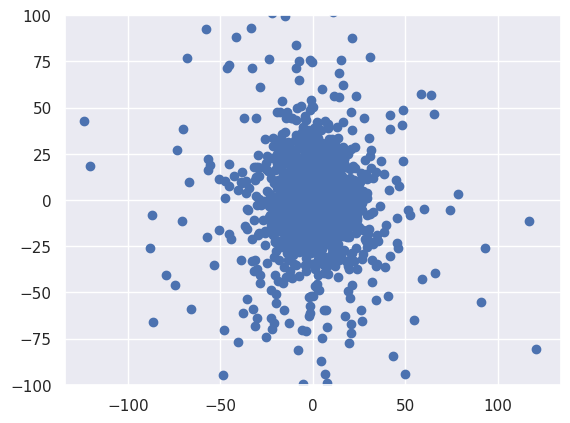

In [47]:
plt.scatter(X_1_c[:, 0], X_1_c[:, 1])
lim = 100
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

In [48]:
mask_1c = np.sqrt(X_1_c[:, 0]**2 + X_1_c[:, 1]**2) < 20
X_1_c_mask = X_1_c[mask_1c]
x = X_1_c_mask[:, 0]
y = X_1_c_mask[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-22.88740774408514 22.32387150040147 -23.746771766853044 23.30835726614463


In [49]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

(-4.0, 4.0)

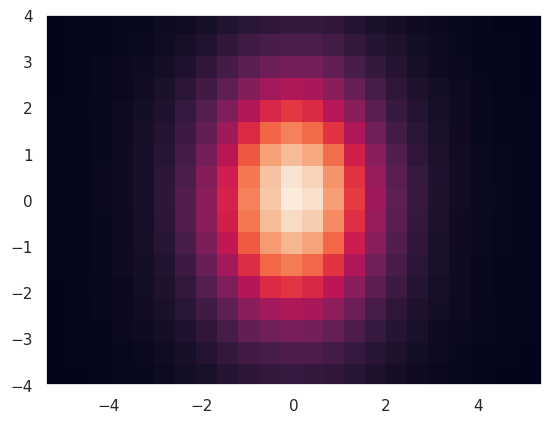

In [50]:
plt.pcolormesh(xx, yy, f)
lim = 4
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

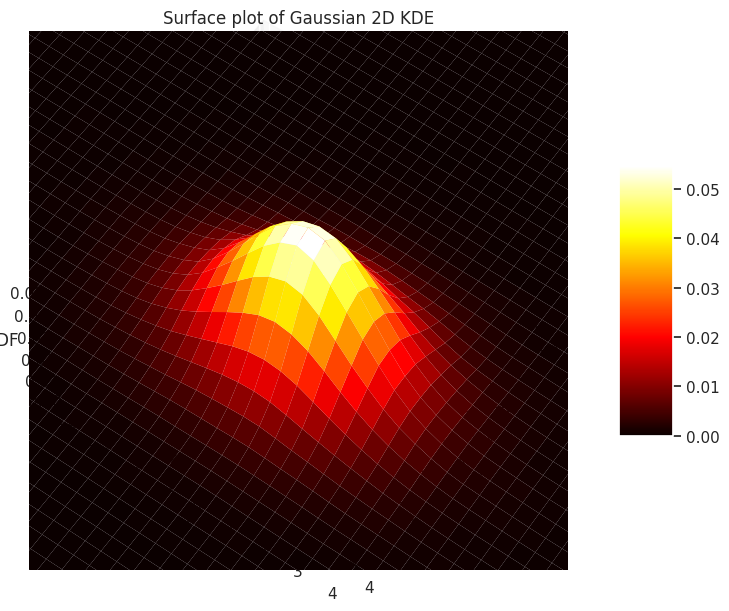

In [51]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 4
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()


sub-gaussian in general sub-stable) vector

Vector $X$ has sub-sub-Gaussian distribution if 

\begin{gather}
    X = \sqrt A [G_1,\dots ,G_d], \\
    A \sim S_{\alpha/2}(\beta = 1, \gamma = (\cos(\frac{\pi \alpha}{4}))^{\frac{\alpha}{2}},\delta = 0\\
    G_i \text{ i.i.d } N(0,\sigma^2)
\end{gather}
$X$ is also $\alpha$-stable vector with continious spectral measure $\Gamma$. In case of i.i.d. $G_1, \dots, G_d$ and $\Gamma$ is unifo
When $G_1, \dots, G_d$ anr not ind. then $\Gamma$ is not uniform.

In [1]:
def sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size = [1, 1]):
    sqrt_A = [[stable_random_variables(alpha/2, beta, gamma, delta)**(1/2)] for _ in range(size[0])]
    return sqrt_A * np.random.normal(0, sigma, size)

In [108]:
alpha = 1.6
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
A = stable_random_variables(alpha/2, beta, gamma, delta)
sigma = 1
d = 2
n = 100000

X_1_b  = sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size = [n, d])

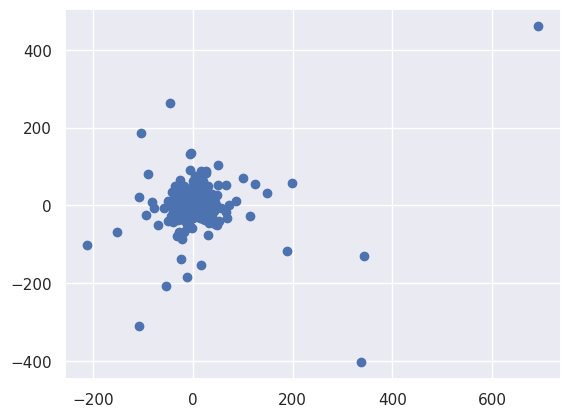

In [65]:
plt.scatter(X_1_b[:, 0], X_1_b[:, 1])

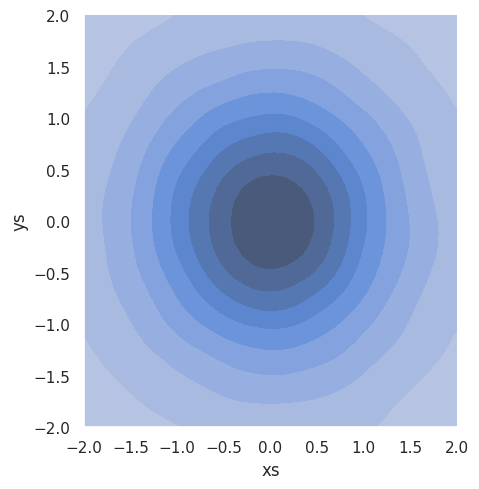

In [69]:
mask_1b = np.sqrt(X_1_b[:, 0]**2 + X_1_b[:, 1]**2) < 10
X_1_b_mask = X_1_b[mask_1b]
sns.displot(
    data= pd.DataFrame(X_1_b_mask, columns= ["xs","ys"]), x = "xs", y = "ys", kind="kde",fill=True
)
lim = 2
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

In [77]:
mask_1b = np.sqrt(X_1_b[:, 0]**2 + X_1_b[:, 1]**2) < 10
X_1_b_mask = X_1_b[mask_1b]
x = X_1_b_mask[:, 0]
y = X_1_b_mask[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-11.910635744017231 11.890771636460553 -11.866037015810862 11.960482440630987


In [78]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

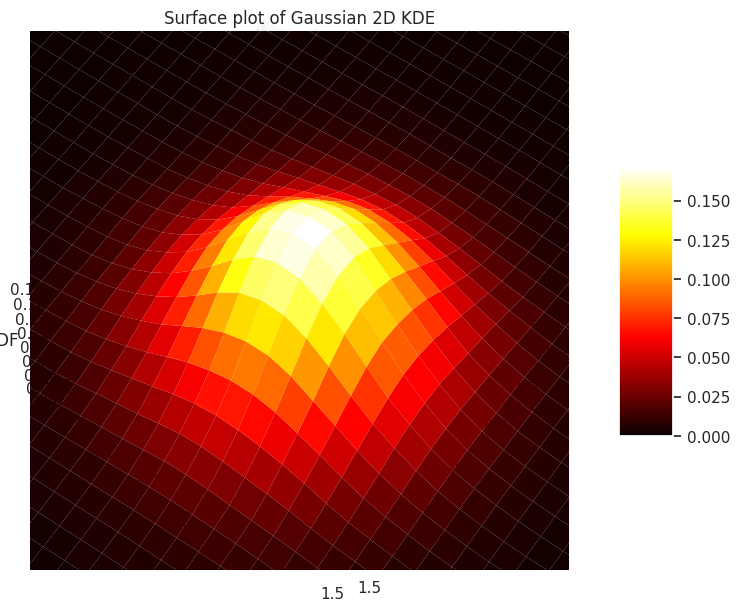

In [79]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 1.5
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

(-2.0, 2.0)

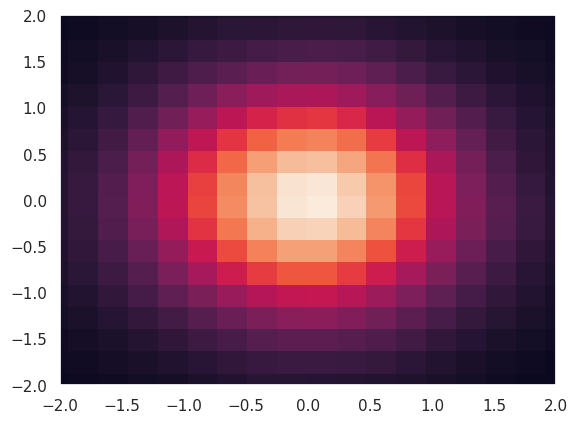

In [82]:
plt.pcolormesh(xx, yy, f)
plt.xlim(-2,2)
plt.ylim(-2,2)

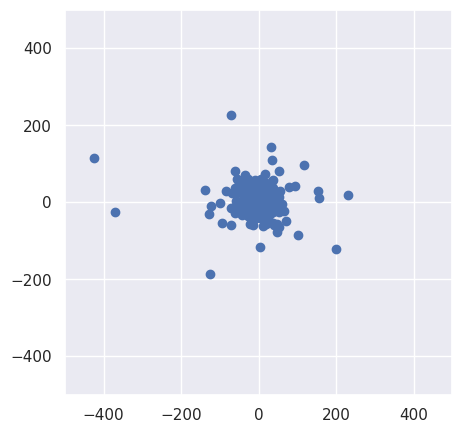

In [133]:
r = 2
r_k = np.sqrt(np.sum(np.power(X_1_b, 2),1))
X_1_b_mask = X_1_b[ r_k > r]
fig,ax=plt.subplots(1, figsize=(5, 5))
ax.scatter(X_1_b_mask[:,0],X_1_b_mask[:,1])
lim  = 500
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])

plt.show()


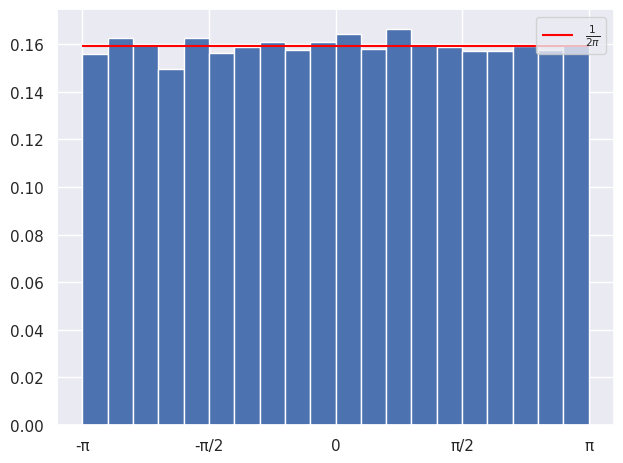

In [143]:

fig,ax=plt.subplots(1)

ax.hist(np.arctan2(X_1_b_mask[:,0], X_1_b_mask[:,1]) , xunits = radians, density= True, bins = 20)
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])

fig.tight_layout()
plt.hlines(1/(2*pi) ,-pi, pi, colors= "red", label="$\\frac{1}{2\\pi}$")
plt.legend()
plt.show()

In [231]:
def sub_gaussian_not_sim(alpha, beta, gamma, delta, sigmas = [1,1], size = [1, 1]):
    sqrt_A = [[stable_random_variables(alpha/2, beta, gamma, delta)**(1/2)] for _ in range(n)]
    return sqrt_A * np.random.normal(0, sigmas, size)
    # print(np.random.normal(0, sigmas, size))

In [322]:
alpha = 1.6
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
A = stable_random_variables(alpha/2, beta, gamma, delta)
sigmas = [0.7, 1]
d = 2
n = 10000

X_1_c  = sub_gaussian_not_sim(alpha, beta, gamma, delta, sigmas, size = [n, d])

(-100.0, 100.0)

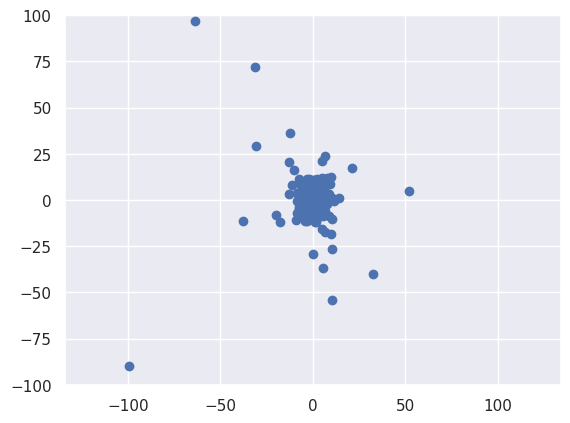

In [323]:
plt.scatter(X_1_c[:, 0], X_1_c[:, 1])
lim = 100
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

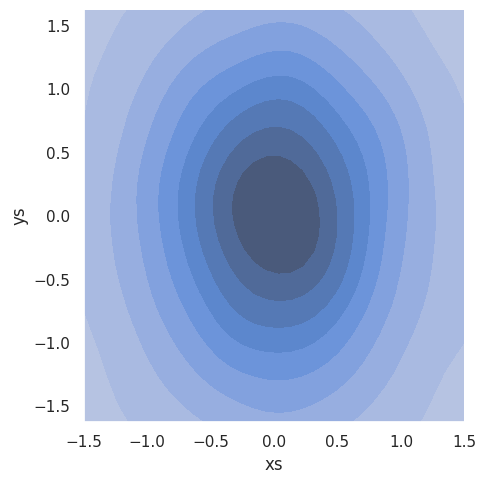

In [324]:

mask_1c = np.sqrt(X_1_c[:, 0]**2 + X_1_c[:, 1]**2) < 10
X_1_c_mask = X_1_c[mask_1c]
sns.displot(
    data= pd.DataFrame(X_1_c_mask, columns= ["xs","ys"]), x = "xs", y = "ys", kind="kde",fill=True
)
lim = 1.5
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

In [325]:
mask_1c = np.sqrt(X_1_c[:, 0]**2 + X_1_c[:, 1]**2) < 20
X_1_c_mask = X_1_c[mask_1c]
x = X_1_c_mask[:, 0]
y = X_1_c_mask[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-15.626435289959838 16.6584749663859 -20.71524819235145 19.64104715835952


In [326]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

(-4.0, 4.0)

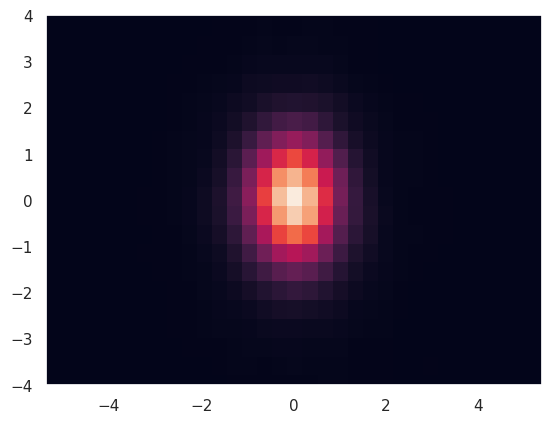

In [327]:
plt.pcolormesh(xx, yy, f)
lim = 4
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

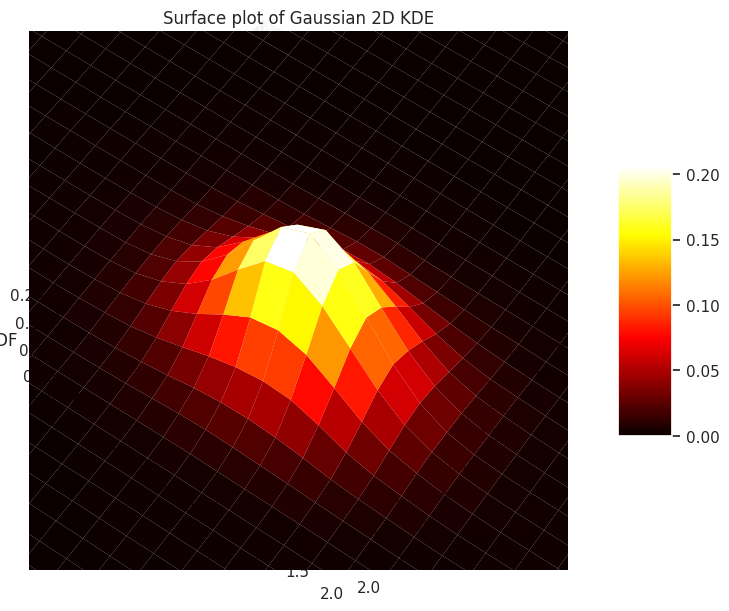

In [328]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 2
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

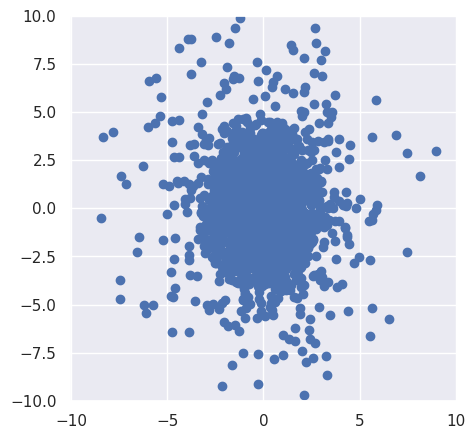

In [335]:
r = 0.01
r_k = np.sqrt(np.sum(np.power(X_1_c, 2),1))
# X_1_c_mask = X_1_c[ r_k > r]
X_1_c_mask = X_1_c[ (r_k > r) & (r_k < 10)]

fig,ax=plt.subplots(1, figsize=(5, 5))
ax.scatter(X_1_c_mask[:,0],X_1_c_mask[:,1])
lim  = 10
plt.axis('equal')
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])

plt.show()


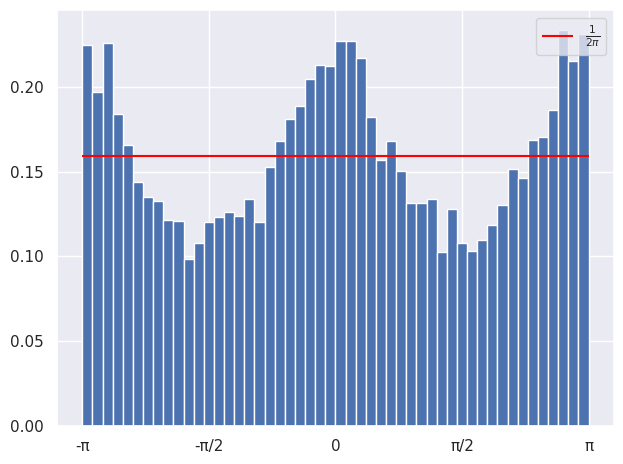

In [336]:
fig,ax=plt.subplots(1)

ax.hist(np.arctan2(X_1_c_mask[:,0], X_1_c_mask[:,1]) , xunits = radians, density= True, bins =50)
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])

fig.tight_layout()
plt.hlines(1/(2*pi) ,-pi, pi, colors= "red", label="$\\frac{1}{2\\pi}$")
plt.legend()
plt.show()